# Hopskotch GCN Circular Message Import Sample: IceCube 210717A and AllWISE AGN Catalog Crossmatch

Authors: Amanda Beck, Zsuzsa Marka

## Index:

1. [AllWISE AGN Catalog Data](#AllWISE-AGN-Catalog-Data:)
2. [Testing Connection to Hop](#Testing-Connection-to-Hop:)
3. [Importing All Available GCN Circular Messages](#Importing-All-Available-GCN-Circular-Messages:)
4. [Reading and Querying Messages](#Reading-and-Querying-Messages:)
5. [Defining IceCube-210730A Circular Contour](#Defining-IceCube-210730A-Circular-Contour:)
6. [Crossmatch](#Crossmatch:)
7. [Plotting](#Plotting:)
8. [Resources](#Resources:)

In [1]:
# general imports:
from astropy.table import Column, Table, join
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import astropy.coordinates as coord
from astropy.io import fits, ascii
import astropy.units as u
import ligo.skymap.moc
import healpy as hp
import numpy as np

# hop-specific imports:
from hop import Stream
from hop import stream
from hop.io import StartPosition

# imports from src code:
import sys
sys.path.append('../src')
from functions import plot_mollview

# defining plot inclusion in notebook:
%matplotlib inline

## AllWISE AGN Catalog Data:

For the purpose of this demonstration, we are using the AllWISE AGN catalog. The link to the catalog can be found in [Resources](#Resources:).

In [2]:
# opening BBH LIGO data:
cat = '../data/allwise.fits' 
allwise = Table.read(cat, format='fits')

# adjusting RA and DEC column names to fit with our convention:
allwise['RA'].name = 'RAJ2000'
allwise['DEC'].name = 'DEJ2000'

allwise[:5]

NAME,RAJ2000,DEJ2000,LII,BII,W1W2_COLOR,W2W3_COLOR,W1_MAG,GMAG,REDSHIFT,REDSHIFT_FLAG,LQAC2_NAME,DR12Q_NAME,MILLIQUAS_NAME
,DEGREE,DEGREE,DEGREE,DEGREE,MAG,MAG,MAG,MAG,,,,,
bytes25,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes13,bytes17,bytes24,bytes26
WISEA J184245.06-894911.0,280.68778,-89.81973,303.13432,-27.12127,0.95,3.48,15.15,0.00,0.00000,,,,
WISEA J043431.62-894617.9,68.63175,-89.77165,302.71954,-27.25653,1.32,3.07,15.12,0.00,0.00000,,,,
WISEA J220915.15-894514.2,332.31317,-89.75395,303.11194,-27.31510,0.95,3.57,16.08,0.00,0.00000,,,,
WISEA J094017.96-894442.8,145.07485,-89.74523,302.72023,-26.95691,0.96,3.16,14.27,0.00,0.00000,,,,
WISEA J233728.16-894436.2,354.36737,-89.74341,303.02356,-27.37156,1.04,3.00,15.21,0.00,0.00000,,,,


## Testing Connection to Hop:

In [12]:
# testing connectivity:
with Stream(persist=True).open("kafka://kafka.scimma.org/sys.heartbeat", "r") as src:
    for i, message in zip(range(5), src):
        print(i, message)
# time in unix time.
# count since system is up that day.

0 {'timestamp': 1628013291253783, 'count': 29080, 'beat': 'listen'}
1 {'timestamp': 1628013292255117, 'count': 29081, 'beat': 'Listen'}
2 {'timestamp': 1628013293256439, 'count': 29082, 'beat': 'LISTEN'}
3 {'timestamp': 1628013294257426, 'count': 29083, 'beat': 'listen to my heart beat'}
4 {'timestamp': 1628013295258834, 'count': 29084, 'beat': 'listen'}


## Importing All Available GCN Circular Messages:

In [4]:
# making a Stream object:
stream = Stream(start_at=StartPosition.EARLIEST) # specifying where to start (EARLIEST gets all of the available)

# creating a message list:
messages = []

# printing messeges for GCN circulars:
with stream.open("kafka://kafka.scimma.org/gcn.circular", "r") as s:
    for message in s:
        messages.append(message)
        print(message)

TITLE:   GCN CIRCULAR
NUMBER:  30458
SUBJECT: Recent activity of SGR 1935+2154 as observed by CGBM
DATE:    21/07/13 09:59:01 GMT
FROM:    Valentin Pal'shin at AGU  <val@phys.aoyama.ac.jp>

S. Nakahira (RIKEN),
A. Yoshida, T. Sakamoto, V. Pal'shin, S. Sugita (AGU),
Y. Kawakubo (LSU), K. Yamaoka (Nagoya U), Y. Asaoka (ICRR),
S. Torii, Y. Akaike, K. Kobayashi (Waseda U),
Y. Shimizu, T. Tamura (Kanagawa U), N. Cannady (GSFC/UMBC),
M. L. Cherry (LSU), S. Ricciarini (U of Florence),
P. S. Marrocchesi (U of Siena),
and the CALET collaboration:

During the recent reactivation of SGR 1935+2154 reported by
INTEGRAL (GCN 30395), GECAM (GCNs 30400, 30415, 30430, 30437, 30449),
Fermi-GBM (GCN 30407), and Konus-Wind (GCNs 30409, 30418, 30450)
the CALET Gamma-ray Burst Monitor (CGBM) has triggered on two bright
short soft bursts from this SGR (alerted trigger 1309652996:
http://cgbm.calet.jp/cgbm_trigger/flight/1309652996/
and trigger 1309983742, which was not alerted).
Additional two weaker short s

TITLE:   GCN CIRCULAR
NUMBER:  30462
SUBJECT: Fermi  trigger No 648024201: Global MASTER-Net observations report
DATE:    21/07/15 09:30:08 GMT
FROM:    Vladimir Lipunov at Moscow State U/Krylov Obs  <lipunov@xray.sai.msu.ru>

V. Lipunov, E. Gorbovskoy, V.Kornilov, N.Tyurina, P.Balanutsa, A.Kuznetsov, F.Balakin,
V.Vladimirov, D. Vlasenko, I.Gorbunov, D.Zimnukhov, V.Senik, T.Pogrosheva,
D.Kuvshinov,  D. Cheryasov
(Lomonosov Moscow State University, SAI, Physics Department),

R. Podesta, C.Lopez, F. Podesta, C.Francile
(Observatorio Astronomico Felix Aguilar OAFA),

R. Rebolo, M. Serra
(The Instituto de Astrofisica de Canarias),

D. Buckley
(South African Astronomical Observatory),

O.A. Gres, N.M. Budnev, O.Ershova
(Irkutsk State University, API),

A. Tlatov, D. Dormidontov
(Kislovodsk Solar Station of the Pulkovo Observatory),

V. Yurkov, A. Gabovich, Yu. Sergienko
(Blagoveschensk Educational State University)




MASTER-OAFA robotic telescope  (Global MASTER-Net: http://observ.pereple

TITLE:   GCN CIRCULAR
NUMBER:  30529
SUBJECT: GRB 210724A: Swift/UVOT Upper Limits
DATE:    21/07/27 06:17:13 GMT
FROM:    Sam LaPorte at PSU  <sjl5346@psu.edu>

 GRB 210724A: Swift/UVOT Upper Limits

S. J. LaPorte (PSU) and P. D'Avanzo (INAF-OAB)
report on behalf of the Swift/UVOT team:

The Swift/UVOT began settled observations of the field of GRB 210724A
125 s after the BAT trigger (D'Avanzo et al., GCN Circ. 30497).
No optical afterglow consistent with the XRT position
(D'Avanzo et al. GCN Circ. 30497)
is detected in the initial UVOT exposures.
Preliminary 3-sigma upper limits using the UVOT photometric system
(Breeveld et al. 2011, AIP Conf. Proc. 1358, 373) for the first
finding chart (FC) exposure and subsequent exposures are:

Filter         T_start(s)   T_stop(s)      Exp(s)         Mag

white_FC           125          275          147         >20.8
u_FC               283          513          226         >20.1
white              125          275          147         >20.8
u  

## Reading and Querying Messages:

In [5]:
messages[0].serialize()['content']['header']

{'title': 'GCN CIRCULAR',
 'number': '30458',
 'subject': 'Recent activity of SGR 1935+2154 as observed by CGBM',
 'date': '21/07/13 09:59:01 GMT',
 'from': "Valentin Pal'shin at AGU  <val@phys.aoyama.ac.jp>"}

In [6]:
# creating a list of readable messages:
readable_messages = []

# serializing messages into readable dictionaries:
for m in messages:
    readable_messages.append(m.serialize())

In [7]:
# make list of messages matching what we want (IceCube events):
IceCube_messages = []
other_messages = []

for i in range(len(readable_messages)):
    if ('IceCube observation of a high-energy neutrino candidate' in 
        readable_messages[i]['content']['header']['subject']):
        IceCube_messages.append(readable_messages[i])
    else:
        other_messages.append(readable_messages[i])

In [8]:
IceCube_messages

[{'format': 'circular',
  'content': {'header': {'title': 'GCN CIRCULAR',
    'number': '30468',
    'subject': 'IceCube-210717A: IceCube observation of a high-energy neutrino candidate track-like event',
    'date': '21/07/18 15:22:53 GMT',
    'from': 'Cristina Lagunas Gualda at DESY  <cristina.lagunas@desy.de>'},
   'body': 'The IceCube Collaboration (http://icecube.wisc.edu/) reports:\n\nOn 21/07/17 at 15:45:19.48 UT IceCube detected a high-energy starting event [1]. The IceCube online selection did not identify this event as a Gold or Bronze starting track. However, based on advanced reconstructions performed offline, we identify this event as a potential astrophysical neutrino of interest to the community, given its topology and light deposition. Because the event was not identified as either Gold or Bronze, we do not currently report a false alert rate or signalness. The IceCube detector was in a normal operating state at the time of detection.\n\nAdvanced reconstruction algorit

## Defining IceCube-210717A Circular Contour:

In [9]:
# creating empty skymap:
n_side_empty = 128
n_pix_empty = hp.nside2npix(n_side_empty)
hpix_empty = np.zeros(n_pix_empty)

# defining central coordinates and radius:
cent_ra = 46.49 # central RA [deg] rotated 180 for the plotting convention.
cent_dec = -1.34 # central DEC [deg]
radius = 2.7525*u.deg # averaged errors on ra and dec for simplicity of plotting a circle. [deg]

# defining offset angle array:
theta = np.linspace(0, 360, 200)*u.deg # [deg]
center = SkyCoord(cent_ra*u.deg, 
                  cent_dec*u.deg, 
                  frame='icrs')
circle = center.directional_offset_by(theta, 
                                      radius)

# defining RA and DEC of circle points:
circ_ra = circle.ra.degree
circ_dec = circle.dec.degree

## Crossmatch:

In [10]:
# overlapping AllWISE with this circle:
# matches will have offset angle less than or equal to 2.7525deg
allwise_coords = SkyCoord(np.array(allwise['RAJ2000'])*u.deg, 
                          np.array(allwise['DEJ2000'])*u.deg, 
                          frame='icrs')
center_coords = SkyCoord(np.full(len(allwise_coords), cent_ra)*u.deg, 
                         np.full(len(allwise_coords), cent_dec)*u.deg, 
                         frame='icrs')

distances = center_coords.separation(allwise_coords).value
indexes_matches = np.where(distances <= 2.7525)
        
icecube_matches_ra = allwise['RAJ2000'][indexes_matches[0]]
icecube_matches_dec = allwise['DEJ2000'][indexes_matches[0]]
# this can also be done with AXS, once it is public.

# if you want to save the matches with all info available in allwise, do this:
matches = allwise[indexes_matches[0]]

# number of matches:
number_matches = len(indexes_matches[0])
print('Number of AllWISE sources in IceCube-210717A area: ' + str(number_matches))

Number of AllWISE sources in IceCube-210717A area: 849


## Plotting:

0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 15 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 15 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


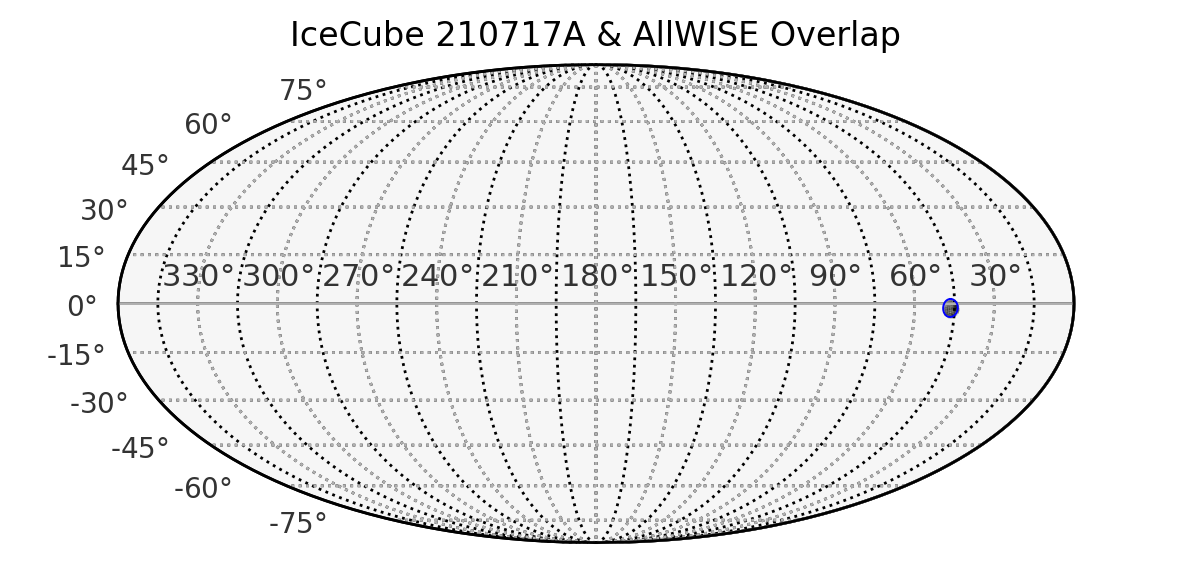

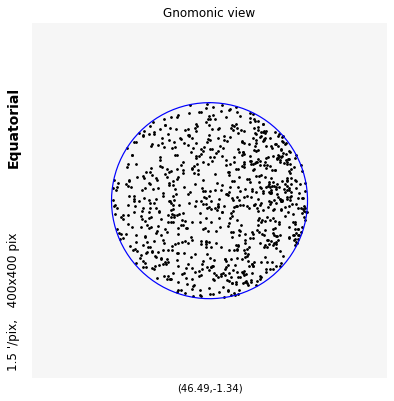

In [11]:
plot_mollview(hpix_empty, 
              nest=True, 
              cmap='PiYG', 
              title='IceCube 210717A & AllWISE Overlap', 
              cbar=False, 
              unit=None)
hp.projplot(circ_ra, 
            circ_dec, 
            lonlat=True, 
            coord='C', 
            c='b', 
            linewidth=0.7)
hp.projscatter(icecube_matches_ra, 
               icecube_matches_dec, 
               lonlat=True, 
               s=0.0001,
               c='k')

plt.savefig('../plots/IceCube_AllWISE_overlap.pdf')

hp.gnomview(hpix_empty, 
            nest=True, 
            cmap='PiYG',
            rot=(cent_ra, cent_dec, 0),
            coord='C',
            xsize=400,
            cbar=False)
hp.projplot(circ_ra, 
            circ_dec, 
            lonlat=True, 
            coord='C', 
            c='b', 
            linewidth=1.2)
hp.projscatter(icecube_matches_ra, 
               icecube_matches_dec, 
               lonlat=True, 
               s=3, 
               c='k')

## Resources:

### Hopskotch:
1. [Hopskotch Documentation](https://hop-client.readthedocs.io/en/latest/user/installation.html)
2. Installing `hop-client`: `pip install hop-client`

### General Resources:
1. [Astropy](https://www.astropy.org)
2. [HEALPy Documentation](https://healpy.readthedocs.io/en/latest/)
2. [GWOSC](https://www.gw-openscience.org/about/)
3. [Anaconda Documentation](https://docs.anaconda.com/anaconda/)
4. [Conda Documentation](https://docs.conda.io/projects/conda/en/latest/index.html)
5. [Conda Forge](https://conda-forge.org/docs/user/introduction.html)
6. [Finding Highest Probability for Multiorder Skymaps](https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html)
8. [Multi-Order Skymaps](https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html)
7. [LIGO moc Documentation](https://lscsoft.docs.ligo.org/ligo.skymap/moc/index.html)
8. [RA and DEC to Degree Converter](https://www.swift.psu.edu/secure/toop/convert.htm)
9. [SCiMMA Project](https://scimma.org/index.html)